In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt


In [2]:
src =  cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('image load fail!')
    sys.exit()  

dst(x,y) = saturate( src(x,y) + alpha*(src(x,y) - 128) )

== (1+alpha)*src - 128*alpha

np.clip 을 통해 픽셀값 최소최대 0, 255 지정

In [3]:
alpha = 1.0
dst = np.clip( ((1+alpha)*src - 128*alpha), 0, 255 ).astype(np.uint8)


In [5]:
cv2.imshow('src', src)
cv2.imshow('dst', dst)
if cv2.waitKey() == 27 :
    cv2.destroyAllWindows()


In [6]:
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.normalize(src, 
                    None, 
                    0, 
                    255, 
                    cv2.NORM_MINMAX
                    )


cv2.imshow('src', src)
cv2.imshow('dst', dst)
if cv2.waitKey() == 27 :
    cv2.destroyAllWindows()


normalize를 이용해서 histogram상의 어느지점에 집중되어있던 픽셀 분포를

0~255사이의 값들로 일반화 시켜준다.


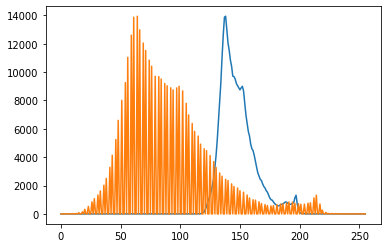

In [7]:
hist1 = cv2.calcHist([src], [0], None, [256], [0,256])
hist2 = cv2.calcHist([dst], [0], None, [256], [0,256])
plt.plot(hist1)
plt.plot(hist2)
plt.show()


cv2.calcHist의 입력중 images는 영상 이미지 '리스트'즉 배열이 들어가야 한다.


histogtram equalization
영상에서의 픽셀값 분포를 픽셀값마다 정리하여 각 값의 확률을 구하고

최대 픽셀값을 반올림 정수화 시켜 나타낼 수 있다.

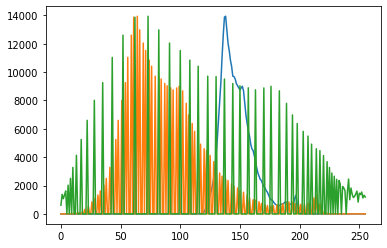

In [8]:
from multiprocessing.connection import wait


src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst_histo_stretch = cv2.normalize(src, 
                    None, 
                    0, 
                    255, 
                    cv2.NORM_MINMAX
                    )


dst_equalize = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('Histogram_stretching', dst_histo_stretch)
cv2.imshow('equalization', dst_equalize)


hist1 = cv2.calcHist([src], [0], None, [256], [0,256])
hist2 = cv2.calcHist([dst_histo_stretch], [0], None, [256], [0,256])
hist3 = cv2.calcHist([dst_equalize], [0], None, [256], [0,256])

plt.plot(hist1)
plt.plot(hist2)
plt.plot(hist3)
plt.show()

if cv2.waitKey() == 27:
    cv2.destroyAllWindows()

rgb로 histogram equalization을 할 경우에 각 채널별로 진행하고 

마지막에 병합하는 과정에서 전채적인 색이 변질되게 된다.

색의 대비를 조절하는것이 목적이므로 색의 변질을 막기 위해

rgb가 아닌 (Y)(밝기), (Cr, Cb)(색상정보) 만을 활용하여 

이중 Y(밝기)에 대해서만 히스토그램 평활화를 진행하고 병합하여 색변조를 방지한다.

In [ ]:
src = cv2.imread('field.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
planes = cv2.split(src_ycrcb) ##반환값 tuple

temp_list = list(planes) # 색체계 변환한 것을 list 형태로 바꿔 data assignment 가능하도록 한다.
##temp = tuple(np.expand_dims((cv2.equalizeHist(planes[0])), axis=0))
temp = cv2.equalizeHist(planes[0]) ###이부분의 반환값이 tuple이 아니다 ndarray 이다.
temp_list[0] = temp

dst_ycrcb = cv2.merge(temp_list)

dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

if cv2.waitKey() == 27:
    cv2.destroyAllWindows()



split의 반환값이 tuple 인 관계로 tuple에 data assign이 불가. 불러올수는 있음

data를 전부 ndarray, list 로 형변환

마지막에 merge